<a href="https://colab.research.google.com/github/NguyenHuynhNgoc20146187/AI/blob/main/Predictor_10bac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           mpg      disp        hp        wt
mpg   1.000000 -0.847551 -0.776168 -0.867659
disp -0.847551  1.000000  0.790949  0.887980
hp   -0.776168  0.790949  1.000000  0.658748
wt   -0.867659  0.887980  0.658748  1.000000


<AxesSubplot:xlabel='wt', ylabel='mpg'>

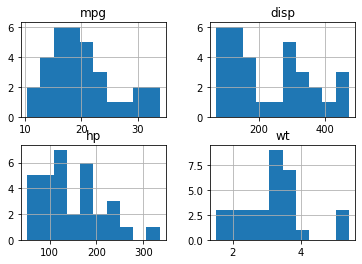

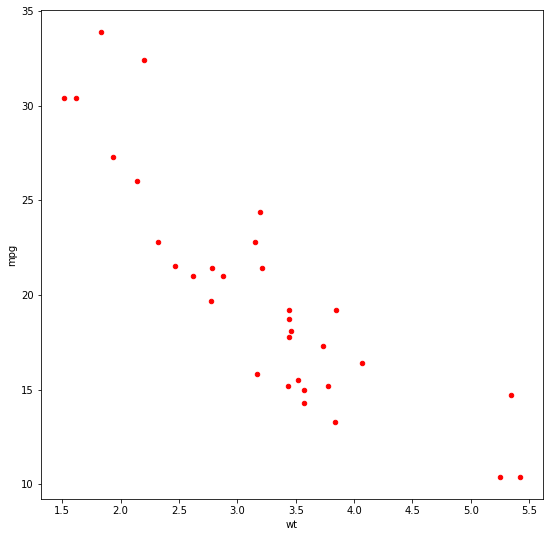

In [42]:
#Hồi qui Bậc 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Xác định công suất của xe phụ thuộc vào...
url = 'mtcars.csv'
data = pd.read_csv(url)


data.hist()

correlation=data.corr()
print(correlation)

X = data.drop(data.columns[[0,2]], axis = 1)

data.plot(kind = 'scatter', x='wt', y = 'mpg', figsize = (9,9), color ='red') #scatter: là vẽ chấm điểm


In [22]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X= pd.DataFrame(data['wt']), y= data['mpg'])
print(model.intercept_)
print(model.coef_)

37.28512616734204
[-5.34447157]


In [32]:
#Độ chính xác
X= pd.DataFrame(data['wt'])
y= data['mpg']
model.score(X,y)

0.7528327936582646

In [36]:
#giá trị tiên đoán
y_pred = model.predict(X)
residual = data['mpg']-y_pred
residual.describe()

count    3.200000e+01
mean    -8.215650e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

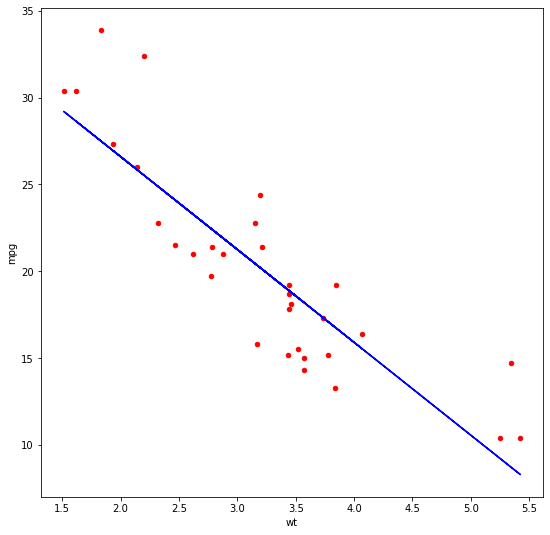

In [40]:
#Vẽ scatter
data.plot(kind = 'scatter', x='wt', y = 'mpg', figsize = (9,9), color ='red')
plt.plot(data['wt'], y_pred, color ='blue')

In [44]:
X


,mpg,hp,wt
0,21.0,110,2.620
1,21.0,110,2.875
2,22.8,93,2.320
3,21.4,110,3.215
4,18.7,175,3.440
5,18.1,105,3.460
6,14.3,245,3.570
7,24.4,62,3.190
8,22.8,95,3.150
9,19.2,123,3.440


In [50]:
#Bậc 2 
#----------------------------------------
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2]).T
#ax + ax^2 + b, x là bậc 1, bậc 2; y là mpg
model.fit(X, y=data['mpg'])
print('Intercept của mô hình bậc 2')
print(model.intercept_)
print('Coeffient của mô hình bậc 2')
print(model.coef_)
print('Độ chính xác của mô hình')
print(model.score(X,y))



Intercept của mô hình bậc 2
49.93081094945181
Coeffient của mô hình bậc 2
[-13.38033708   1.17108689]
Độ chính xác của mô hình
0.8190613581384094


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


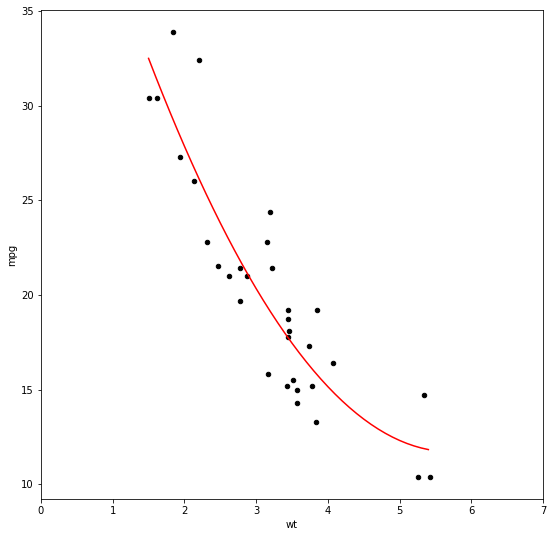

In [56]:
#Vẽ
range = np.arange(1.5,5.5,0.1)
predictor = pd.DataFrame([range,range**2]).T
y_pred = model.predict(X=predictor)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9),color = 'black', xlim=(0,7))
plt.plot(range,y_pred,color = 'red')

Intercept của mô hình bậc 3
48.40369622795221
Coeffient của mô hình bậc 3
[-11.82597602   0.68937919   0.04593618]
Độ chính xác của mô hình
0.8191284628478992


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


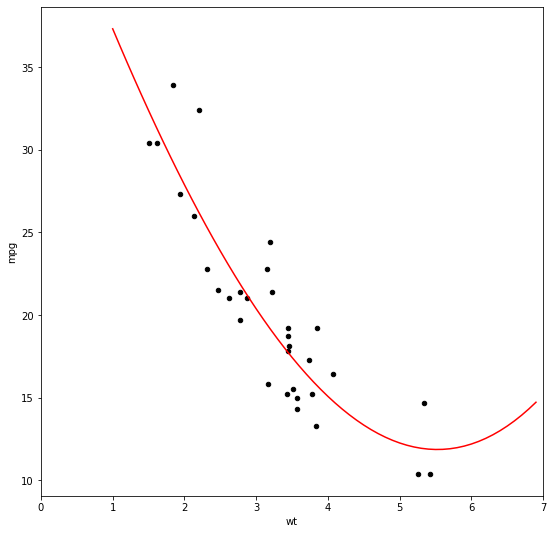

In [62]:
#Bậc 3
#----------------------------------------
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3]).T

model.fit(X, y=data['mpg'])
print('Intercept của mô hình bậc 3')
print(model.intercept_)
print('Coeffient của mô hình bậc 3')
print(model.coef_)
print('Độ chính xác của mô hình')
print(model.score(X,y))

#Vẽ
range = np.arange(1,7,0.1)
predictor = pd.DataFrame([range,range**2,range**3]).T
y_pred = model.predict(X=predictor)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9),color = 'black', xlim=(0,7))
plt.plot(range,y_pred,color = 'red')

Intercept của mô hình bậc 4
14.455833054796258
Coeffient của mô hình bậc 4
[ 36.61945631 -23.70175729   5.20042113  -0.38627878]
Độ chính xác của mô hình
0.8219709873435187


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


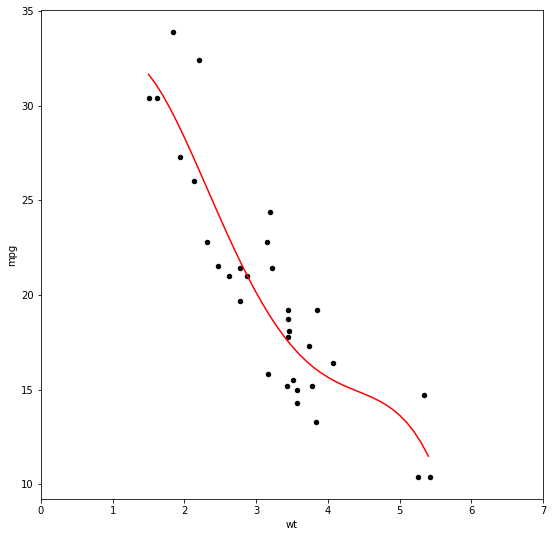

In [61]:
#Bậc 4
#----------------------------------------
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3,data['wt']**4]).T

model.fit(X, y=data['mpg'])
print('Intercept của mô hình bậc 4')
print(model.intercept_)
print('Coeffient của mô hình bậc 4')
print(model.coef_)
print('Độ chính xác của mô hình')
print(model.score(X,y))

#Vẽ
range = np.arange(1.5,5.5,0.1)
predictor = pd.DataFrame([range,range**2,range**3,range**4]).T
y_pred = model.predict(X=predictor)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9),color = 'black', xlim=(0,7))
plt.plot(range,y_pred,color = 'red')

Intercept của mô hình bậc 5
-87.71816314301019
Coeffient của mô hình bậc 5
[ 218.88967608 -147.77842682   45.60934841   -6.70138798    0.37968337]
Độ chính xác của mô hình
0.8251088272653132


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


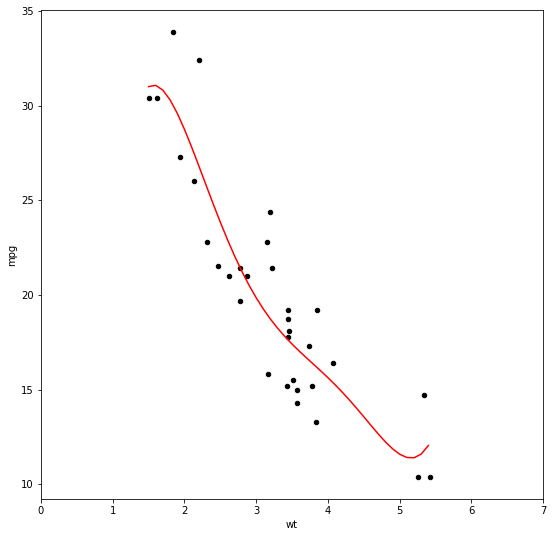

In [63]:
#Bậc 5
#----------------------------------------
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3,data['wt']**4,data['wt']**5]).T

model.fit(X, y=data['mpg'])
print('Intercept của mô hình bậc 5')
print(model.intercept_)
print('Coeffient của mô hình bậc 5')
print(model.coef_)
print('Độ chính xác của mô hình')
print(model.score(X,y))

#Vẽ
range = np.arange(1.5,5.5,0.1)
predictor = pd.DataFrame([range,range**2,range**3,range**4,range**5]).T
y_pred = model.predict(X=predictor)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9),color = 'black', xlim=(0,7))
plt.plot(range,y_pred,color = 'red')

Intercept của mô hình bậc 6
-580.1180291191426
Coeffient của mô hình bậc 6
[ 1.25251793e+03 -1.01544961e+03  4.19153811e+02 -9.38894251e+01
  1.08661013e+01 -5.09042883e-01]
Độ chính xác của mô hình
0.8322482465599783


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


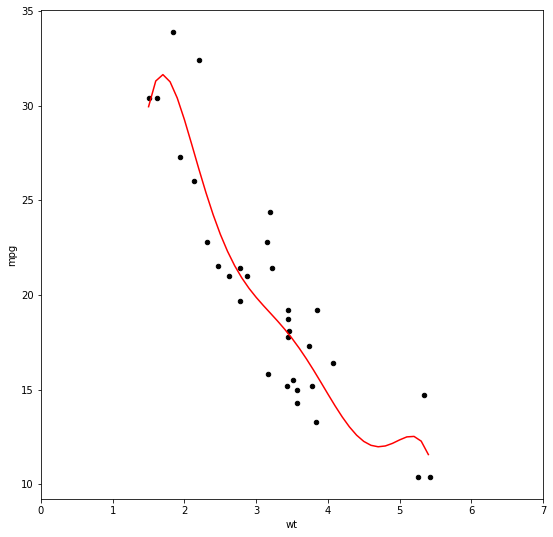

In [64]:
#Bậc 6
#----------------------------------------
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3,data['wt']**4,data['wt']**5,data['wt']**6]).T

model.fit(X, y=data['mpg'])
print('Intercept của mô hình bậc 6')
print(model.intercept_)
print('Coeffient của mô hình bậc 6')
print(model.coef_)
print('Độ chính xác của mô hình')
print(model.score(X,y))

#Vẽ
range = np.arange(1.5,5.5,0.1)
predictor = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6]).T
y_pred = model.predict(X=predictor)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9),color = 'black', xlim=(0,7))
plt.plot(range,y_pred,color = 'red')

Intercept của mô hình bậc 7
-2387.286256135588
Coeffient của mô hình bậc 7
[ 5.71347281e+03 -5.57680321e+03  2.92547757e+03 -8.93984147e+02
  1.59440329e+02 -1.53893379e+01  6.21028572e-01]
Độ chính xác của mô hình
0.8380739929060077


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


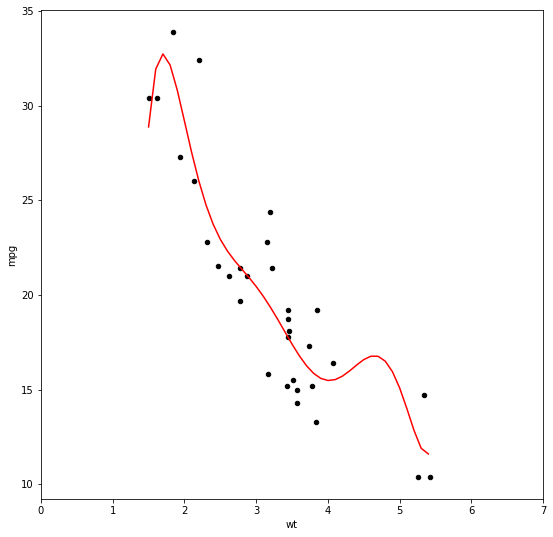

In [65]:
#Bậc 7
#----------------------------------------
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3,data['wt']**4,data['wt']**5,data['wt']**6,data['wt']**7]).T

model.fit(X, y=data['mpg'])
print('Intercept của mô hình bậc 7')
print(model.intercept_)
print('Coeffient của mô hình bậc 7')
print(model.coef_)
print('Độ chính xác của mô hình')
print(model.score(X,y))

#Vẽ
range = np.arange(1.5,5.5,0.1)
predictor = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7]).T
y_pred = model.predict(X=predictor)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9),color = 'black', xlim=(0,7))
plt.plot(range,y_pred,color = 'red')

Intercept của mô hình bậc 8
1582.7973359661294
Coeffient của mô hình bậc 8
[-5.64544414e+03  8.25196062e+03 -6.43425547e+03  2.96002820e+03
 -8.29805697e+02  1.39294521e+02 -1.28609866e+01  5.01914523e-01]
Độ chính xác của mô hình
0.8402829929877587


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


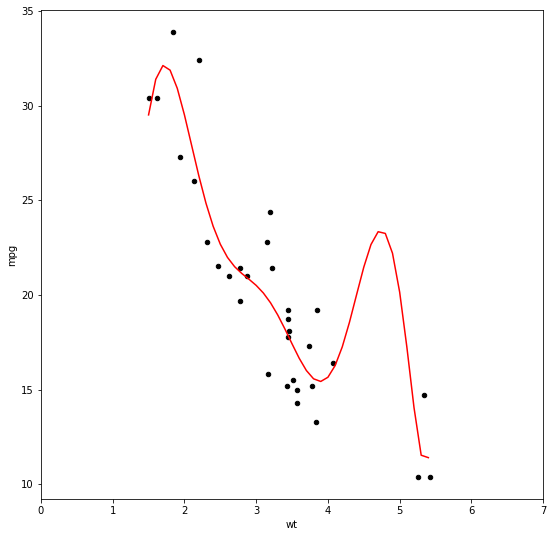

In [66]:
#Bậc 8
#----------------------------------------
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3,data['wt']**4,data['wt']**5,data['wt']**6,data['wt']**7,data['wt']**8]).T

model.fit(X, y=data['mpg'])
print('Intercept của mô hình bậc 8')
print(model.intercept_)
print('Coeffient của mô hình bậc 8')
print(model.coef_)
print('Độ chính xác của mô hình')
print(model.score(X,y))

#Vẽ
range = np.arange(1.5,5.5,0.1)
predictor = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8]).T
y_pred = model.predict(X=predictor)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9),color = 'black', xlim=(0,7))
plt.plot(range,y_pred,color = 'red')

Intercept của mô hình bậc 9
38889.610890257565
Coeffient của mô hình bậc 9
[-1.25317627e+05  1.74784059e+05 -1.38423294e+05  6.86522656e+04
 -2.21343938e+04  4.64432999e+03 -6.12230173e+02  4.60606389e+01
 -1.50849985e+00]
Độ chính xác của mô hình
0.8646786785489688


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


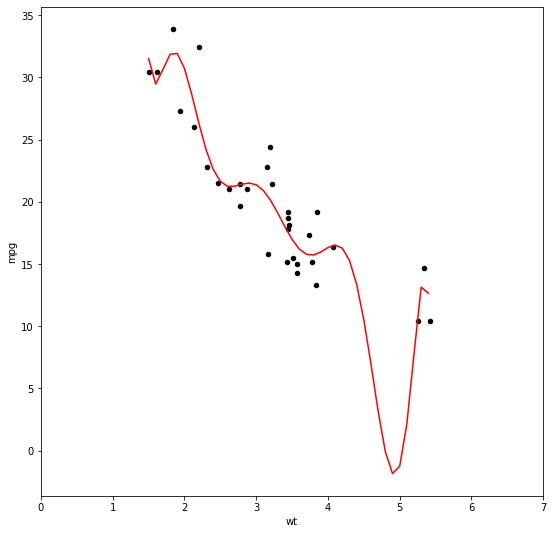

In [67]:
#Bậc 9
#----------------------------------------
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3,data['wt']**4,data['wt']**5,data['wt']**6,data['wt']**7,data['wt']**8,data['wt']**9]).T

model.fit(X, y=data['mpg'])
print('Intercept của mô hình bậc 9')
print(model.intercept_)
print('Coeffient của mô hình bậc 9')
print(model.coef_)
print('Độ chính xác của mô hình')
print(model.score(X,y))

#Vẽ
range = np.arange(1.5,5.5,0.1)
predictor = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9]).T
y_pred = model.predict(X=predictor)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9),color = 'black', xlim=(0,7))
plt.plot(range,y_pred,color = 'red')

Intercept của mô hình bậc 10
-14921.11995188375
Coeffient của mô hình bậc 10
[ 6.45813558e+04 -1.20086131e+05  1.26931928e+05 -8.46598454e+04
  3.73155199e+04 -1.10334755e+04  2.16590404e+03 -2.70730544e+02
  1.94974162e+01 -6.15515436e-01]
Độ chính xác của mô hình
0.8702106571479111


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


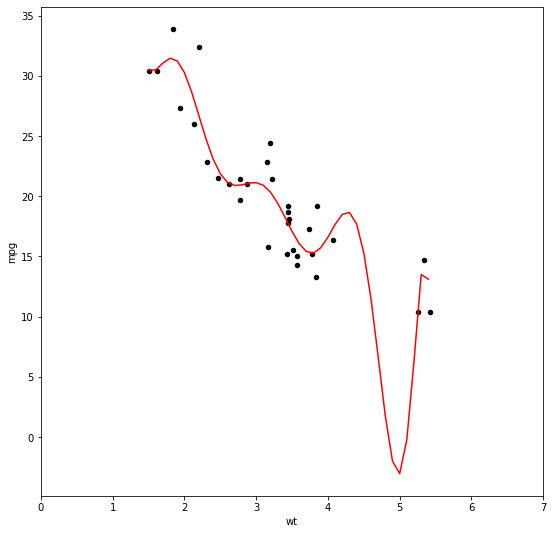

In [68]:
#Bậc 10
#----------------------------------------
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3,data['wt']**4,data['wt']**5,data['wt']**6,data['wt']**7,data['wt']**8,data['wt']**9,data['wt']**10]).T

model.fit(X, y=data['mpg'])
print('Intercept của mô hình bậc 10')
print(model.intercept_)
print('Coeffient của mô hình bậc 10')
print(model.coef_)
print('Độ chính xác của mô hình')
print(model.score(X,y))

#Vẽ
range = np.arange(1.5,5.5,0.1)
predictor = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9, range**10]).T
y_pred = model.predict(X=predictor)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9),color = 'black', xlim=(0,7))
plt.plot(range,y_pred,color = 'red')